<a href="https://colab.research.google.com/github/antonellafontanetto/Etapas-Fracturadas---YPF/blob/main/Etapas_Fracturadas_de_YPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapas Fracturadas  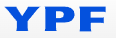

El presente proyecto pretende hacer una recopilación de datos y análisis exploratorios en relación a la evolución de las etapas fracturadas por pozos petroleros y gasíferos de YPF en los últimos años en Vaca Muerte.

Este análisis pretende continuar con la línea de pensamiento de predecir el crecimiento de YPF en el marco del proyecto 4x4 considerando como principal pilar el crecimiento exponencial de Vaca Muerta en los próximos 4 años.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import calendar
import locale
from matplotlib.colors import LinearSegmentedColormap

In [2]:
etapasfracturadas = pd.read_csv('/content/datosdefracturadepozos.zip',usecols=['idpozo','anio','mes','empresa_informante','cuenca','areapermisoconcesion','yacimiento','tipo_reservorio','subtipo_reservorio','longitud_rama_horizontal_m','cantidad_fracturas','tipo_terminacion','arena_bombeada_nacional_tn','arena_bombeada_importada_tn','agua_inyectada_m3','co2_inyectado_m3','presion_maxima_psi','potencia_equipos_fractura_hp'])
etapasfracturadas

,idpozo,cuenca,areapermisoconcesion,yacimiento,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,cantidad_fracturas,tipo_terminacion,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,empresa_informante,mes,anio
0,159910,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,NO CONVENCIONAL,SHALE,0.0,3,Punzado,0.0000,0.000,2718.20,0.0,10190.000000,10897.0,CAPEX S.A.,4,2019
1,159910,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,NO CONVENCIONAL,SHALE,0.0,1,Punzado,0.0000,0.000,600.00,0.0,9250.000000,10251.0,CAPEX S.A.,11,2018
2,159219,NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,NO CONVENCIONAL,SHALE,1437.3,18,Tapón disparo,3761.3700,536.850,25768.30,0.0,15000.000000,32000.0,YPF S.A.,11,2017
3,159220,NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,NO CONVENCIONAL,SHALE,1518.3,19,Tapón disparo,3903.7050,558.225,27398.37,0.0,11348.000000,32000.0,YPF S.A.,11,2017
4,159221,NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,NO CONVENCIONAL,SHALE,1482.3,19,Tapón disparo,3949.0200,569.925,27157.60,0.0,11076.000000,32000.0,YPF S.A.,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,166315,NEUQUINA,LA AMARGA CHICA,LA AMARGA CHICA,NO CONVENCIONAL,SHALE,3578.0,57,Tapón disparo,13519.5300,0.000,85810.42,0.0,11502.133260,44000.0,YPF S.A.,1,2025
4070,166316,NEUQUINA,LA AMARGA CHICA,LA AMARGA CHICA,NO CONVENCIONAL,SHALE,3352.0,54,Tapón disparo,12444.4350,0.000,81084.12,0.0,12118.146258,44000.0,YPF S.A.,1,2025
4071,166317,NEUQUINA,LA AMARGA CHICA,LA AMARGA CHICA,NO CONVENCIONAL,SHALE,3398.0,56,Tapón disparo,13340.9295,0.000,85118.19,0.0,11361.179928,44000.0,YPF S.A.,1,2025
4072,166325,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,NO CONVENCIONAL,SHALE,2547.7,42,Tapón disparo,10095.5250,0.000,59930.08,0.0,12169.208061,44000.0,YPF S.A.,2,2025


In [3]:
#Filtro por cada dataset solo los registros para YPF S.A.
ef_ypf = etapasfracturadas[(etapasfracturadas['empresa_informante'] == 'YPF S.A.')&(etapasfracturadas['cuenca'] == 'NEUQUINA')&(etapasfracturadas['anio']>2022)]

ef_ypf

,idpozo,cuenca,areapermisoconcesion,yacimiento,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,cantidad_fracturas,tipo_terminacion,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,empresa_informante,mes,anio
3321,163955,NEUQUINA,RIO NEUQUEN,RIO NEUQUEN,NO CONVENCIONAL,TIGHT,0.00,14,Tapón disparo,0.0000,1538.01,6979.57,0.0,10610.045168,24000.0,YPF S.A.,1,2023
3330,164027,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA,NO CONVENCIONAL,SHALE,2435.00,40,Tapón disparo,9006.6465,0.00,54657.22,0.0,12115.159356,40000.0,YPF S.A.,1,2023
3332,164029,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA,NO CONVENCIONAL,SHALE,2163.21,35,Tapón disparo,8378.8740,0.00,48242.07,0.0,11565.996071,40000.0,YPF S.A.,1,2023
3334,164031,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA,NO CONVENCIONAL,SHALE,1932.00,31,Tapón disparo,7220.8845,0.00,43538.16,0.0,11908.067478,40000.0,YPF S.A.,1,2023
3375,164108,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,NO CONVENCIONAL,SHALE,2188.00,36,Tapón disparo,8652.0195,0.00,55748.14,0.0,11585.197585,40000.0,YPF S.A.,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,166315,NEUQUINA,LA AMARGA CHICA,LA AMARGA CHICA,NO CONVENCIONAL,SHALE,3578.00,57,Tapón disparo,13519.5300,0.00,85810.42,0.0,11502.133260,44000.0,YPF S.A.,1,2025
4070,166316,NEUQUINA,LA AMARGA CHICA,LA AMARGA CHICA,NO CONVENCIONAL,SHALE,3352.00,54,Tapón disparo,12444.4350,0.00,81084.12,0.0,12118.146258,44000.0,YPF S.A.,1,2025
4071,166317,NEUQUINA,LA AMARGA CHICA,LA AMARGA CHICA,NO CONVENCIONAL,SHALE,3398.00,56,Tapón disparo,13340.9295,0.00,85118.19,0.0,11361.179928,44000.0,YPF S.A.,1,2025
4072,166325,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,NO CONVENCIONAL,SHALE,2547.70,42,Tapón disparo,10095.5250,0.00,59930.08,0.0,12169.208061,44000.0,YPF S.A.,2,2025


In [4]:
#Con rename se logró renombrar las columnas que tenían nombres abreviados o poco legibles
ef_ypf=ef_ypf.rename(columns={'anio':'Año','idpozo':'ID pozo','mes':'Mes','empresa_informante':'Empresa informante','cuenca':'Cuenca','areapermisoconcesion':'Área permiso concesión','yacimiento':'Yacimiento','tipo_reservorio':'Tipo reservorio','subtipo_reservorio':'Subtipo reservorio','longitud_rama_horizontal_m':'Longitud rama horizontal (m)','cantidad_fracturas':'Cantidad fracturas','tipo_terminacion':'Tipo terminación','arena_bombeada_nacional_tn':'Arena bombeada nacional (tn)','arena_bombeada_importada_tn':'Arena bombeada importada (tn)','agua_inyectada_m3':'Agua inyectada (m3)','co2_inyectado_m3':'CO2 inyectado (m3)','presion_maxima_psi':'Presión máxima (psi)','potencia_equipos_fractura_hp':'Potencia equipos fractura (hp)'})
ef_ypf

,ID pozo,Cuenca,Área permiso concesión,Yacimiento,Tipo reservorio,Subtipo reservorio,Longitud rama horizontal (m),Cantidad fracturas,Tipo terminación,Arena bombeada nacional (tn),Arena bombeada importada (tn),Agua inyectada (m3),CO2 inyectado (m3),Presión máxima (psi),Potencia equipos fractura (hp),Empresa informante,Mes,Año
3321,163955,NEUQUINA,RIO NEUQUEN,RIO NEUQUEN,NO CONVENCIONAL,TIGHT,0.00,14,Tapón disparo,0.0000,1538.01,6979.57,0.0,10610.045168,24000.0,YPF S.A.,1,2023
3330,164027,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA,NO CONVENCIONAL,SHALE,2435.00,40,Tapón disparo,9006.6465,0.00,54657.22,0.0,12115.159356,40000.0,YPF S.A.,1,2023
3332,164029,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA,NO CONVENCIONAL,SHALE,2163.21,35,Tapón disparo,8378.8740,0.00,48242.07,0.0,11565.996071,40000.0,YPF S.A.,1,2023
3334,164031,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA,NO CONVENCIONAL,SHALE,1932.00,31,Tapón disparo,7220.8845,0.00,43538.16,0.0,11908.067478,40000.0,YPF S.A.,1,2023
3375,164108,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,NO CONVENCIONAL,SHALE,2188.00,36,Tapón disparo,8652.0195,0.00,55748.14,0.0,11585.197585,40000.0,YPF S.A.,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,166315,NEUQUINA,LA AMARGA CHICA,LA AMARGA CHICA,NO CONVENCIONAL,SHALE,3578.00,57,Tapón disparo,13519.5300,0.00,85810.42,0.0,11502.133260,44000.0,YPF S.A.,1,2025
4070,166316,NEUQUINA,LA AMARGA CHICA,LA AMARGA CHICA,NO CONVENCIONAL,SHALE,3352.00,54,Tapón disparo,12444.4350,0.00,81084.12,0.0,12118.146258,44000.0,YPF S.A.,1,2025
4071,166317,NEUQUINA,LA AMARGA CHICA,LA AMARGA CHICA,NO CONVENCIONAL,SHALE,3398.00,56,Tapón disparo,13340.9295,0.00,85118.19,0.0,11361.179928,44000.0,YPF S.A.,1,2025
4072,166325,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,NO CONVENCIONAL,SHALE,2547.70,42,Tapón disparo,10095.5250,0.00,59930.08,0.0,12169.208061,44000.0,YPF S.A.,2,2025


In [5]:
#Vamos a ver que tipo de estructura tiene ef_ypf
type(ef_ypf)

pandas.core.frame.DataFrame

In [6]:
#Con la función shape podemos ver la cantidad de observaciones y feature que contiene el dataframe ef_ypf
ef_ypf.shape

(374, 18)

In [7]:
#Con la función columns podemos ver el nombre de todos los features que contiene el dataframe ef_ypf
ef_ypf.columns

Index(['ID pozo', 'Cuenca', 'Área permiso concesión', 'Yacimiento',
       'Tipo reservorio', 'Subtipo reservorio', 'Longitud rama horizontal (m)',
       'Cantidad fracturas', 'Tipo terminación',
       'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)',
       'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)',
       'Potencia equipos fractura (hp)', 'Empresa informante', 'Mes', 'Año'],
      dtype='object')

In [8]:
#A través de la función head() puedo visualizar las primeras 5 observaciones del dataframe
ef_ypf.head()

,ID pozo,Cuenca,Área permiso concesión,Yacimiento,Tipo reservorio,Subtipo reservorio,Longitud rama horizontal (m),Cantidad fracturas,Tipo terminación,Arena bombeada nacional (tn),Arena bombeada importada (tn),Agua inyectada (m3),CO2 inyectado (m3),Presión máxima (psi),Potencia equipos fractura (hp),Empresa informante,Mes,Año
3321,163955,NEUQUINA,RIO NEUQUEN,RIO NEUQUEN,NO CONVENCIONAL,TIGHT,0.00,14,Tapón disparo,0.0000,1538.01,6979.57,0.0,10610.045168,24000.0,YPF S.A.,1,2023
3330,164027,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA,NO CONVENCIONAL,SHALE,2435.00,40,Tapón disparo,9006.6465,0.00,54657.22,0.0,12115.159356,40000.0,YPF S.A.,1,2023
3332,164029,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA,NO CONVENCIONAL,SHALE,2163.21,35,Tapón disparo,8378.8740,0.00,48242.07,0.0,11565.996071,40000.0,YPF S.A.,1,2023
3334,164031,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA,NO CONVENCIONAL,SHALE,1932.00,31,Tapón disparo,7220.8845,0.00,43538.16,0.0,11908.067478,40000.0,YPF S.A.,1,2023
3375,164108,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,NO CONVENCIONAL,SHALE,2188.00,36,Tapón disparo,8652.0195,0.00,55748.14,0.0,11585.197585,40000.0,YPF S.A.,1,2023


In [9]:
#Mientras que con la función tail(10) puedo observar los últimos 10 registros de información del dataset ef_ypf
ef_ypf.tail(10)

,ID pozo,Cuenca,Área permiso concesión,Yacimiento,Tipo reservorio,Subtipo reservorio,Longitud rama horizontal (m),Cantidad fracturas,Tipo terminación,Arena bombeada nacional (tn),Arena bombeada importada (tn),Agua inyectada (m3),CO2 inyectado (m3),Presión máxima (psi),Potencia equipos fractura (hp),Empresa informante,Mes,Año
4064,166321,NEUQUINA,BANDURRIA SUR,BANDURRIA SUR,NO CONVENCIONAL,SHALE,2851.30,40,Tapón disparo,9492.6600,0.0,56864.97,0.0,13215.192727,44000.0,YPF S.A.,1,2025
4065,166322,NEUQUINA,BANDURRIA SUR,BANDURRIA SUR,NO CONVENCIONAL,SHALE,2868.00,51,Tapón disparo,12376.4400,0.0,84701.15,0.0,12294.089015,44000.0,YPF S.A.,1,2025
4066,166323,NEUQUINA,BANDURRIA SUR,BANDURRIA SUR,NO CONVENCIONAL,SHALE,2944.00,49,Tapón disparo,11633.4450,0.0,69776.93,0.0,11762.135975,44000.0,YPF S.A.,1,2025
4067,166324,NEUQUINA,BANDURRIA SUR,BANDURRIA SUR,NO CONVENCIONAL,SHALE,2967.00,57,Tapón disparo,13392.1350,0.0,90429.70,0.0,11927.126758,44000.0,YPF S.A.,1,2025
4068,166314,NEUQUINA,LA AMARGA CHICA,LA AMARGA CHICA,NO CONVENCIONAL,SHALE,3499.35,52,Tapón disparo,12096.5085,0.0,78858.29,0.0,13073.101527,44000.0,YPF S.A.,1,2025
4069,166315,NEUQUINA,LA AMARGA CHICA,LA AMARGA CHICA,NO CONVENCIONAL,SHALE,3578.00,57,Tapón disparo,13519.5300,0.0,85810.42,0.0,11502.133260,44000.0,YPF S.A.,1,2025
4070,166316,NEUQUINA,LA AMARGA CHICA,LA AMARGA CHICA,NO CONVENCIONAL,SHALE,3352.00,54,Tapón disparo,12444.4350,0.0,81084.12,0.0,12118.146258,44000.0,YPF S.A.,1,2025
4071,166317,NEUQUINA,LA AMARGA CHICA,LA AMARGA CHICA,NO CONVENCIONAL,SHALE,3398.00,56,Tapón disparo,13340.9295,0.0,85118.19,0.0,11361.179928,44000.0,YPF S.A.,1,2025
4072,166325,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,NO CONVENCIONAL,SHALE,2547.70,42,Tapón disparo,10095.5250,0.0,59930.08,0.0,12169.208061,44000.0,YPF S.A.,2,2025
4073,166326,NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,NO CONVENCIONAL,SHALE,2547.70,42,Tapón disparo,10068.7725,0.0,60196.45,0.0,12391.092216,44000.0,YPF S.A.,2,2025


In [10]:
#Con dtypes podemos visualizar el tipo de dato de cada feature del dataset, el mismo contiene datos enteros, flotantes y objeto
ef_ypf.dtypes

,0
ID pozo,int64
Cuenca,object
Área permiso concesión,object
Yacimiento,object
Tipo reservorio,object
Subtipo reservorio,object
Longitud rama horizontal (m),float64
Cantidad fracturas,int64
Tipo terminación,object
Arena bombeada nacional (tn),float64


In [11]:
#Vamos a ver si el dataset presenta datos faltantes con la función isnull().sum() , el resultado nos arroja que el dataset no contiene datos faltantes
datosfaltantes=ef_ypf.isnull().sum()
datosfaltantes

,0
ID pozo,0
Cuenca,0
Área permiso concesión,0
Yacimiento,0
Tipo reservorio,0
Subtipo reservorio,0
Longitud rama horizontal (m),0
Cantidad fracturas,0
Tipo terminación,0
Arena bombeada nacional (tn),0


In [12]:
#Aplicamos la función describe para poder visualizar la estadistica descriptiva de algunas features en particular
ef_ypf[['Cantidad fracturas','Arena bombeada nacional (tn)','Arena bombeada importada (tn)','Agua inyectada (m3)','CO2 inyectado (m3)','Presión máxima (psi)','Potencia equipos fractura (hp)']].describe()


,Cantidad fracturas,Arena bombeada nacional (tn),Arena bombeada importada (tn),Agua inyectada (m3),CO2 inyectado (m3),Presión máxima (psi),Potencia equipos fractura (hp)
count,374.000000,374.000000,374.000000,374.000000,374.0,374.000000,374.000000
mean,42.799465,9823.196273,78.616925,60475.822299,0.0,12263.602856,40299.465241
std,13.080895,3449.630624,326.240798,21158.622212,0.0,10259.176378,4987.507152
min,10.000000,0.000000,0.000000,4553.000000,0.0,7339.956310,20000.000000
25%,35.000000,8177.538375,0.000000,49486.070000,0.0,11457.436404,40000.000000
50%,44.000000,10226.087100,0.000000,62125.595000,0.0,11713.705491,40000.000000
75%,50.000000,11904.474375,0.000000,71654.472500,0.0,12017.409429,44000.000000
max,87.000000,16787.655000,1672.020000,141633.630000,0.0,209640.559334,44000.000000


In [13]:
#Se utiliza la función groupby para calcular la media de las variables anteriores a partir del año 2023 por mes
ef_ypf.groupby(['Año','Mes'])[
    ['Cantidad fracturas', 'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)',
     'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)', 'Potencia equipos fractura (hp)']
].mean()

Cantidad fracturas  Arena bombeada nacional (tn)  \
Año  Mes                                                     
2023 1             36.428571                   8415.869271   
     2             44.818182                  10099.806177   
     3             39.538462                   8687.298254   
     4             46.285714                  10262.585507   
     5             40.812500                   9199.497459   
     6             42.615385                   9865.070308   
     7             45.666667                  10161.943825   
     8             48.857143                  11155.673121   
     9             36.846154                   8218.222567   
     10            35.434783                   8262.472520   
     11            50.000000                  11981.042663   
     12            50.666667                  11657.382997   
2024 1             46.000000                  10099.079831   
     2             38.944444                   8531.234950   
     3             46.200000                  10464.190501   
     4             44.000000                  10153.257084   
     5             29.578947                   6680.981842   
     6             47.222222                  10598.964400   
     7             46.400000                  11031.747300   
     8             38.944444                   9330.738175   
     9             45.210526                  10733.664600   
     10            51.941176                  12333.936574   
     11            46.888889                  11179.640300   
     12            52.363636                  11973.730500   
2025 1             43.500000                  10375.408125   
     2             42.000000                  10082.148750   

          Arena bombeada importada (tn)  Agua inyectada (m3)  \
Año  Mes                                                       
2023 1                        73.238571         51962.845714   
     2                       102.090909         64527.371818   
     3                       240.487308         62331.427692   
     4                       107.971071         65984.602857   
     5                        84.312500         57981.517500   
     6                         0.000000         60190.582308   
     7                       175.462500         61562.405000   
     8                       119.430000         68171.666429   
     9                       126.408462         50403.085385   
     10                       70.456304         50039.883913   
     11                        0.000000         70221.767500   
     12                        0.000000         70826.698333   
2024 1                        70.981875         65450.031250   
     2                        75.747500         54986.516667   
     3                       144.377333         63082.095333   
     4                        93.896800         60558.768000   
     5                       143.263158         40143.331053   
     6                       325.155000         64307.650000   
     7                         0.000000         64889.739000   
     8                         0.000000         55983.987222   
     9                         0.000000         63896.084737   
     10                        0.000000         74152.207647   
     11                        0.000000         66912.656667   
     12                        0.000000         73566.108182   
2025 1                         0.000000         64834.501000   
     2                         0.000000         60063.265000   

          CO2 inyectado (m3)  Presión máxima (psi)  \
Año  Mes                                             
2023 1                   0.0          11712.882569   
     2                   0.0          11788.397439   
     3                   0.0          11507.182547   
     4                   0.0          25921.865372   
     5                   0.0          11768.136448   
     6                   0.0          11897.673496   
     7                   0.0          12234.6354

In [14]:
#Se utiliza la función groupby para calcular la suma de las variables anteriores a partir del año 2023 por mes
ef_ypf.groupby(['Año','Mes'])[
    ['Cantidad fracturas', 'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)',
     'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)', 'Potencia equipos fractura (hp)']
].sum()

Cantidad fracturas  Arena bombeada nacional (tn)  \
Año  Mes                                                     
2023 1                   765                 176733.254700   
     2                   493                 111097.867950   
     3                   514                 112934.877300   
     4                   648                 143676.197100   
     5                   653                 147191.959350   
     6                   554                 128245.914000   
     7                   822                 182914.988850   
     8                   684                 156179.423700   
     9                   479                 106836.893370   
     10                  815                 190036.867950   
     11                  200                  47924.170650   
     12                  304                  69944.297985   
2024 1                   736                 161585.277300   
     2                   701                 153562.229100   
     3                   693                 156962.857516   
     4                  1100                 253831.427106   
     5                   562                 126938.655000   
     6                   425                  95390.679600   
     7                   464                 110317.473000   
     8                   701                 167953.287150   
     9                   859                 203939.627400   
     10                  883                 209676.921750   
     11                  422                 100616.762700   
     12                  576                 131711.035500   
2025 1                   870                 207508.162500   
     2                    84                  20164.297500   

          Arena bombeada importada (tn)  Agua inyectada (m3)  \
Año  Mes                                                       
2023 1                         1538.010           1091219.76   
     2                         1123.000            709801.09   
     3                         3126.335            810308.56   
     4                         1511.595            923784.44   
     5                         1349.000            927704.28   
     6                            0.000            782477.57   
     7                         3158.325           1108123.29   
     8                         1672.020            954403.33   
     9                         1643.310            655240.11   
     10                        1620.495           1150917.33   
     11                           0.000            280887.07   
     12                           0.000            424960.19   
2024 1                         1135.710           1047200.50   
     2                         1363.455            989757.30   
     3                         2165.660            946231.43   
     4                         2347.420           1513969.20   
     5                         2722.000            762723.29   
     6                         2926.395            578768.85   
     7                            0.000            648897.39   
     8                            0.000           1007711.77   
     9                            0.000           1214025.61   
     10                           0.000           1260587.53   
     11                           0.000            602213.91   
     12                           0.000            809227.19   
2025 1                            0.000           1296690.02   
     2                            0.000            120126.53   

          CO2 inyectado (m3)  Presión máxima (psi)  \
Año  Mes                                             
2023 1                   0.0         245970.533958   
     2                   0.0         129672.371831   
     3                   0.0         149593.373107   
     4                   0.0         362906.115214   
     5                   0.0         188290.183173   
     6                   0.0         154669.755448   
     7                   0.0         220223.4379

In [15]:
#Se utiliza la función groupby para calcular la suma de las variables anteriores a partir del año 2023 por mes y por ID de pozo
ef_ypf.groupby(['Año','Mes','ID pozo'])[
    ['Cantidad fracturas', 'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)',
     'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)', 'Potencia equipos fractura (hp)']
].sum()

Cantidad fracturas  Arena bombeada nacional (tn)  \
Año  Mes ID pozo                                                     
2023 1   163955                   14                        0.0000   
         164027                   40                     9006.6465   
         164029                   35                     8378.8740   
         164031                   31                     7220.8845   
         164108                   36                     8652.0195   
...                              ...                           ...   
2025 1   166322                   51                    12376.4400   
         166323                   49                    11633.4450   
         166324                   57                    13392.1350   
     2   166325                   42                    10095.5250   
         166326                   42                    10068.7725   

                  Arena bombeada importada (tn)  Agua inyectada (m3)  \
Año  Mes ID pozo                                                       
2023 1   163955                         1538.01              6979.57   
         164027                            0.00             54657.22   
         164029                            0.00             48242.07   
         164031                            0.00             43538.16   
         164108                            0.00             55748.14   
...                                         ...                  ...   
2025 1   166322                            0.00             84701.15   
         166323                            0.00             69776.93   
         166324                            0.00             90429.70   
     2   166325                            0.00             59930.08   
         166326                            0.00             60196.45   

                  CO2 inyectado (m3)  Presión máxima (psi)  \
Año  Mes ID pozo                                             
2023 1   163955                  0.0          10610.045168   
         164027                  0.0          12115.159356   
         164029                  0.0          11565.996071   
         164031                  0.0          11908.067478   
         164108                  0.0          11585.197585   
...                              ...                   ...   
2025 1   166322                  0.0          12294.089015   
         166323                  0.0          11762.135975   
         166324                  0.0          11927.126758   
     2   166325                  0.0          12169.208061   
         166326                  0.0          12391.092216   

                  Potencia equipos fractura (hp)  
Año  Mes ID pozo                                  
2023 1   163955                          24000.0  
         164027                          40000.0  
         164029                          40000.0  
         164031                          40000.0  
         164108                          40000.0  
...                                          ...  
2025 1   166322                          44000.0  
         166323                          44000.0  
         166324                          44000.0  
     2   166325                          44000.0  
         166326                          44000.0  

[374 rows x 7 columns]

In [16]:
#Se utiliza la función groupby para calcular la suma de las variables anteriores a partir del año 2023 por mes desde el área con mayor cantidad de fracturas por año
ef_ypf[ef_ypf['Año'] >= 2023].groupby(['Área permiso concesión','Año'])[
    ['Cantidad fracturas', 'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)',
     'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)', 'Potencia equipos fractura (hp)']
].sum().sort_values(by='Año', ascending=False)

,,Cantidad fracturas,Arena bombeada nacional (tn),Arena bombeada importada (tn),Agua inyectada (m3),CO2 inyectado (m3),Presión máxima (psi),Potencia equipos fractura (hp)
Área permiso concesión,Año,,,,,,,
BANDURRIA SUR,2025,446,107145.360000,0.00,672735.31,0.0,122565.393885,440000.0
LA AMARGA CHICA,2025,424,100362.802500,0.00,623954.71,0.0,118168.389537,440000.0
LOMA CAMPANA,2025,84,20164.297500,0.00,120126.53,0.0,24560.300277,88000.0
AGUADA DEL CHAÑAR,2024,954,227522.212672,0.00,1342514.42,0.0,233116.614151,848000.0
LA AMARGA CHICA,2024,1526,365425.165800,0.00,2145798.50,0.0,440370.212012,1588000.0
LA ANGOSTURA SUR I,2024,894,207809.147250,0.00,1249422.38,0.0,211231.440282,792000.0
BAJO DEL TORO NORTE,2024,58,13538.025000,0.00,83028.09,0.0,23587.281362,88000.0
BANDURRIA SUR,2024,1777,418621.702950,0.00,2505589.80,0.0,479992.037210,1716000.0
RIO NEUQUEN,2024,130,0.000000,12660.64,63334.00,0.0,101965.312902,232000.0


In [17]:
#Se utiliza la función groupby para calcular la suma de las variables anteriores a partir del año 2023 por mes desde el área con mayor cantidad de fracturas por año
ef_ypf[ef_ypf['Año'] >= 2023].groupby(['Área permiso concesión'])[
    ['Cantidad fracturas', 'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)',
     'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)', 'Potencia equipos fractura (hp)']
].sum().sort_values(by='Cantidad fracturas', ascending=False)

,Cantidad fracturas,Arena bombeada nacional (tn),Arena bombeada importada (tn),Agua inyectada (m3),CO2 inyectado (m3),Presión máxima (psi),Potencia equipos fractura (hp)
Área permiso concesión,,,,,,,
LOMA CAMPANA,4683,1.078906e+06,0.00,6771659.37,0.0,1.168508e+06,4068000.0
LA AMARGA CHICA,3927,9.234405e+05,0.00,5598114.67,0.0,1.294326e+06,3872000.0
BANDURRIA SUR,3642,8.571233e+05,0.00,5210088.33,0.0,9.789404e+05,3444000.0
AGUADA DEL CHAÑAR,1349,3.210243e+05,0.00,1898924.55,0.0,3.263410e+05,1168000.0
LA ANGOSTURA SUR I,894,2.078091e+05,0.00,1249422.38,0.0,2.112314e+05,792000.0
RINCON DEL MANGRULLO,409,9.216880e+04,0.00,607808.58,0.0,9.728525e+04,320000.0
AGUADA DE LA ARENA,312,7.391009e+04,0.00,434198.57,0.0,9.514563e+04,320000.0
RIO NEUQUEN,285,0.000000e+00,29402.73,139132.83,0.0,2.311576e+05,460000.0
BAJO DEL TORO NORTE,218,5.097651e+04,0.00,303458.86,0.0,7.082784e+04,248000.0


In [18]:
#Filtrar por Loma Campana
loma = ef_ypf[ef_ypf['Área permiso concesión'] == 'LOMA CAMPANA']

In [19]:
#Agrupa por año y mes, y suma etapas fracturadas
evolucion0 = loma.groupby(['Año', 'Mes'])['Cantidad fracturas'].sum().reset_index()

In [20]:
#Crea una columna de fecha para orden cronológico
evolucion0['Fecha'] = pd.to_datetime(evolucion0['Año'].astype(str) + '-' + evolucion0['Mes'].astype(str))

In [21]:
df_grouped['AñoMes'] = df_grouped['Fecha'].dt.strftime('%Y-%m')

NameError: name 'df_grouped' is not defined

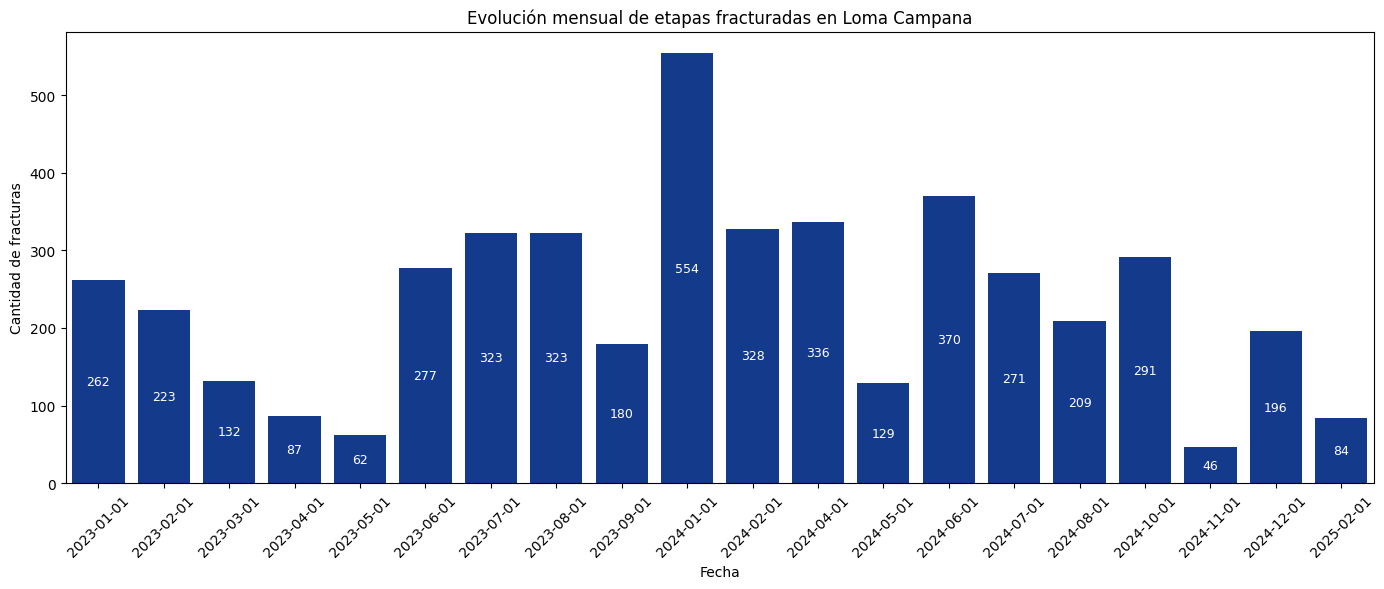

In [22]:
plt.figure(figsize=(14,6))
ax = sns.barplot(data=evolucion0, x='Fecha', y='Cantidad fracturas', color='#0033A0')

for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(v)}" for v in container.datavalues],
                 label_type='center', color='white', fontsize=9)
plt.title('Evolución mensual de etapas fracturadas en Loma Campana')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de fracturas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
print(ef_ypf.columns.tolist())

['ID pozo', 'Cuenca', 'Área permiso concesión', 'Yacimiento', 'Tipo reservorio', 'Subtipo reservorio', 'Longitud rama horizontal (m)', 'Cantidad fracturas', 'Tipo terminación', 'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)', 'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)', 'Potencia equipos fractura (hp)', 'Empresa informante', 'Mes', 'Año']


In [24]:
#Filtrar por La Amarga Chica
laamargachica = ef_ypf[ef_ypf['Área permiso concesión'] == 'LA AMARGA CHICA']

In [25]:
#Agrupa por año y mes, y suma etapas fracturadas
evolucion1 = laamargachica.groupby(['Año', 'Mes'])['Cantidad fracturas'].sum().reset_index()

In [26]:
#Crea una columna de fecha para orden cronológico
evolucion1['Fecha'] = pd.to_datetime(evolucion1['Año'].astype(str) + '-' + evolucion1['Mes'].astype(str))

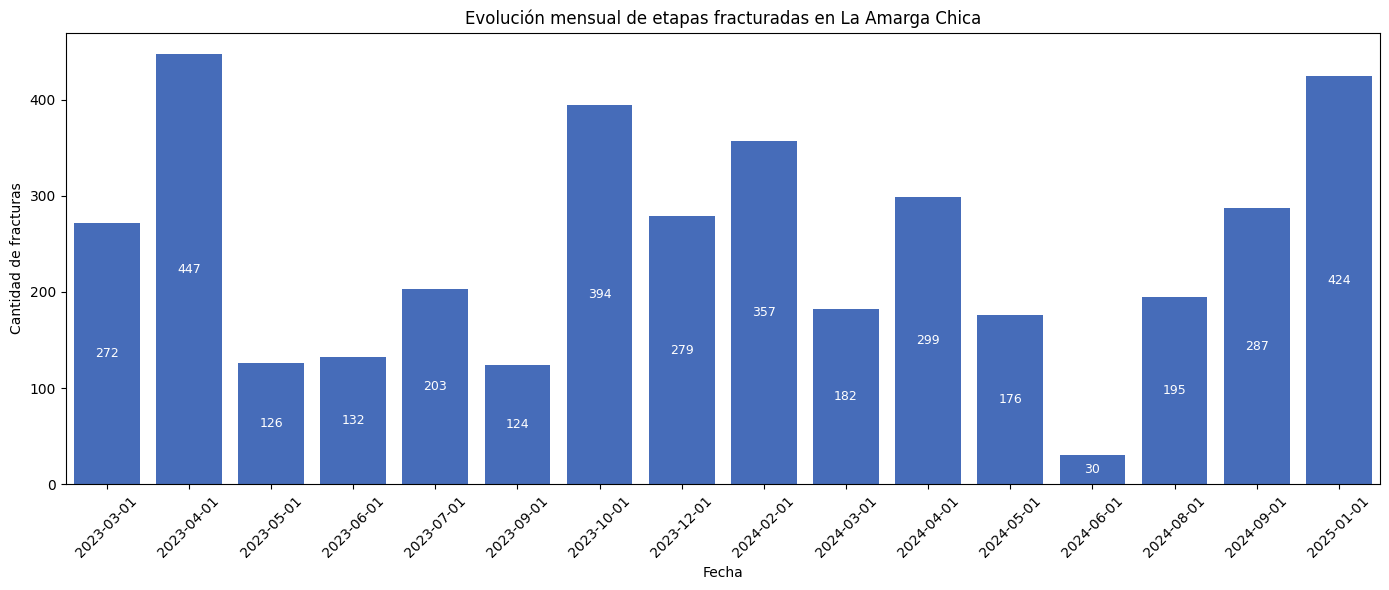

In [27]:
plt.figure(figsize=(14,6))
ax = sns.barplot(data=evolucion1, x='Fecha', y='Cantidad fracturas', color='#3366CC')

for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(v)}" for v in container.datavalues],
                 label_type='center', color='white', fontsize=9)
plt.title('Evolución mensual de etapas fracturadas en La Amarga Chica')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de fracturas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
#Filtrar por Bandurria Sur
bandurriasur = ef_ypf[ef_ypf['Área permiso concesión'] == 'BANDURRIA SUR']

In [29]:
#Agrupa por año y mes, y suma etapas fracturadas
evolucion2 = bandurriasur.groupby(['Año', 'Mes'])['Cantidad fracturas'].sum().reset_index()

In [30]:
#Crea una columna de fecha para orden cronológico
evolucion2['Fecha'] = pd.to_datetime(evolucion2['Año'].astype(str) + '-' + evolucion2['Mes'].astype(str))

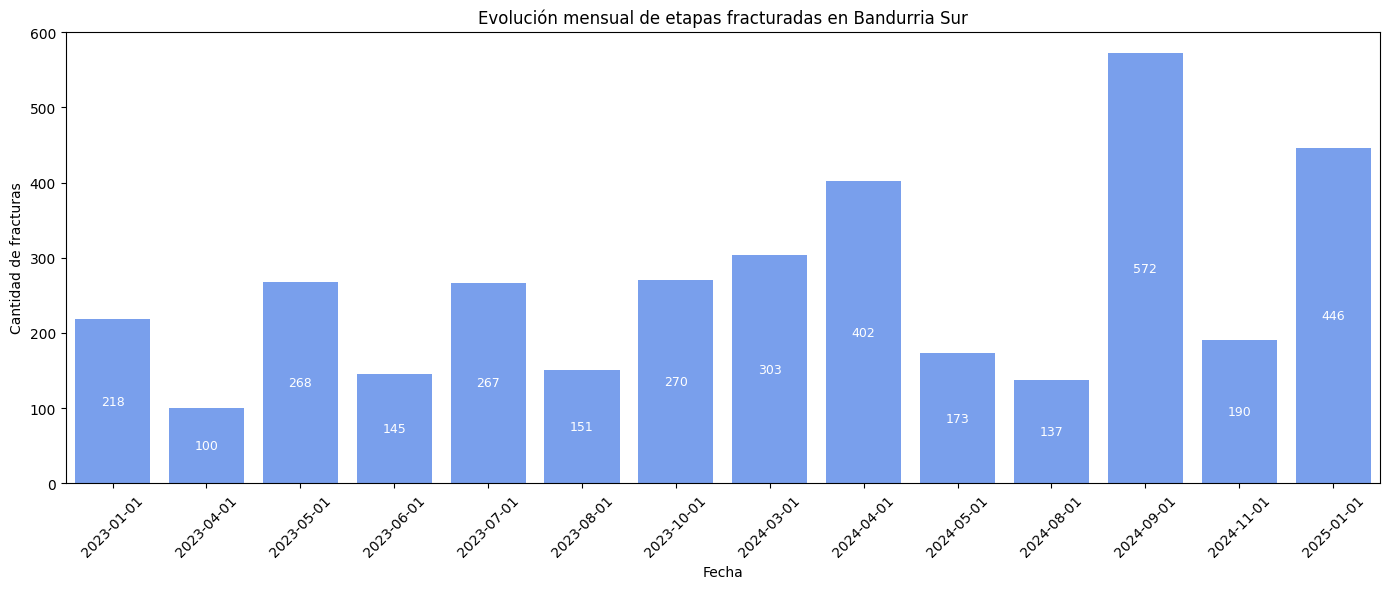

In [31]:
plt.figure(figsize=(14,6))
ax = sns.barplot(data=evolucion2, x='Fecha', y='Cantidad fracturas', color='#6699FF')

for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(v)}" for v in container.datavalues],
                 label_type='center', color='white', fontsize=9)
plt.title('Evolución mensual de etapas fracturadas en Bandurria Sur')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de fracturas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
#Filtrar por Aguada del Chañar
aguadadelchañar = ef_ypf[ef_ypf['Área permiso concesión'] == 'AGUADA DEL CHÁÑAR']

In [33]:
#Agrupa por año y mes, y suma etapas fracturadas
evolucion3 = aguadadelchañar.groupby(['Año', 'Mes'])['Cantidad fracturas'].sum().reset_index()

In [34]:
#Crea una columna de fecha para orden cronológico
evolucion3['Fecha'] = pd.to_datetime(evolucion3['Año'].astype(str) + '-' + evolucion2['Mes'].astype(str))

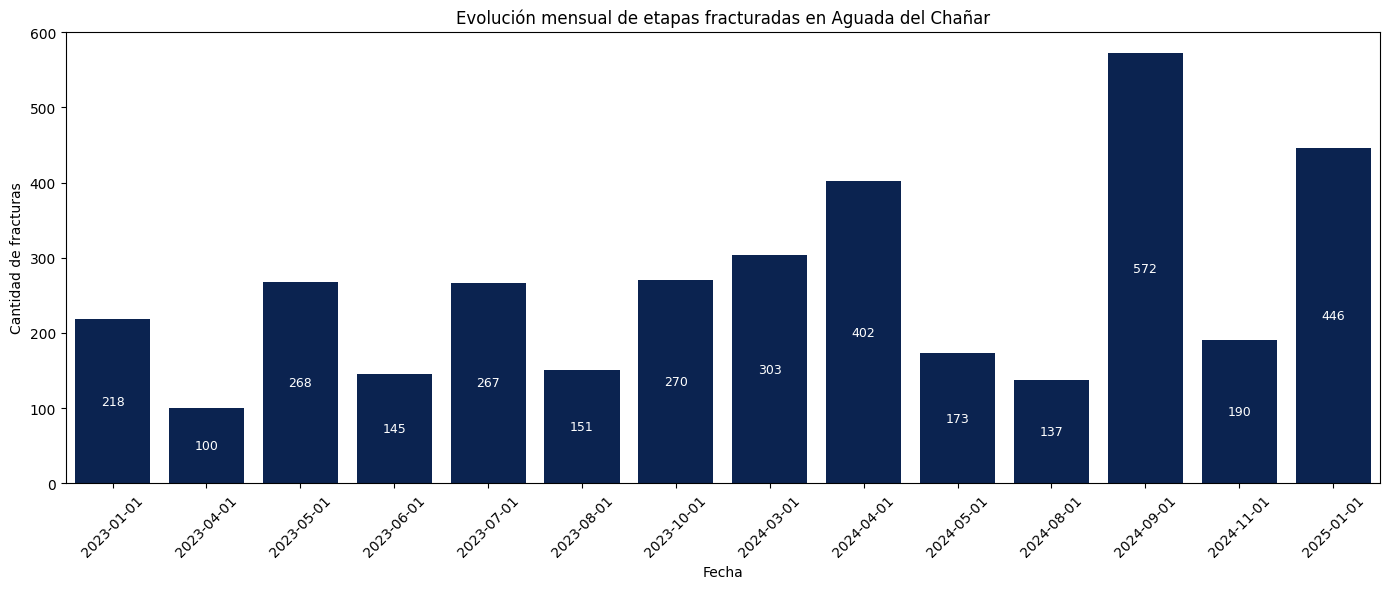

In [35]:
plt.figure(figsize=(14,6))
ax = sns.barplot(data=evolucion2, x='Fecha', y='Cantidad fracturas', color='#001F5B')

for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(v)}" for v in container.datavalues],
                 label_type='center', color='white', fontsize=9)
plt.title('Evolución mensual de etapas fracturadas en Aguada del Chañar')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de fracturas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
df_loma = ef_ypf[(ef_ypf['Área permiso concesión'] == 'LOMA CAMPANA') & (ef_ypf['Año'] >= 2023)]


In [44]:
df_grouped = df_loma.groupby(['Año', 'Mes'])[
    'Arena bombeada nacional (tn)'
].sum().reset_index()

In [45]:
df_grouped['Fecha'] = pd.to_datetime(df_grouped['Año'].astype(str) + '-' + df_grouped['Mes'].astype(str) + '-01')

In [46]:
df_grouped = df_grouped.sort_values('Fecha')

In [47]:
df_grouped['AñoMes'] = df_grouped['Fecha'].dt.strftime('%Y-%m')

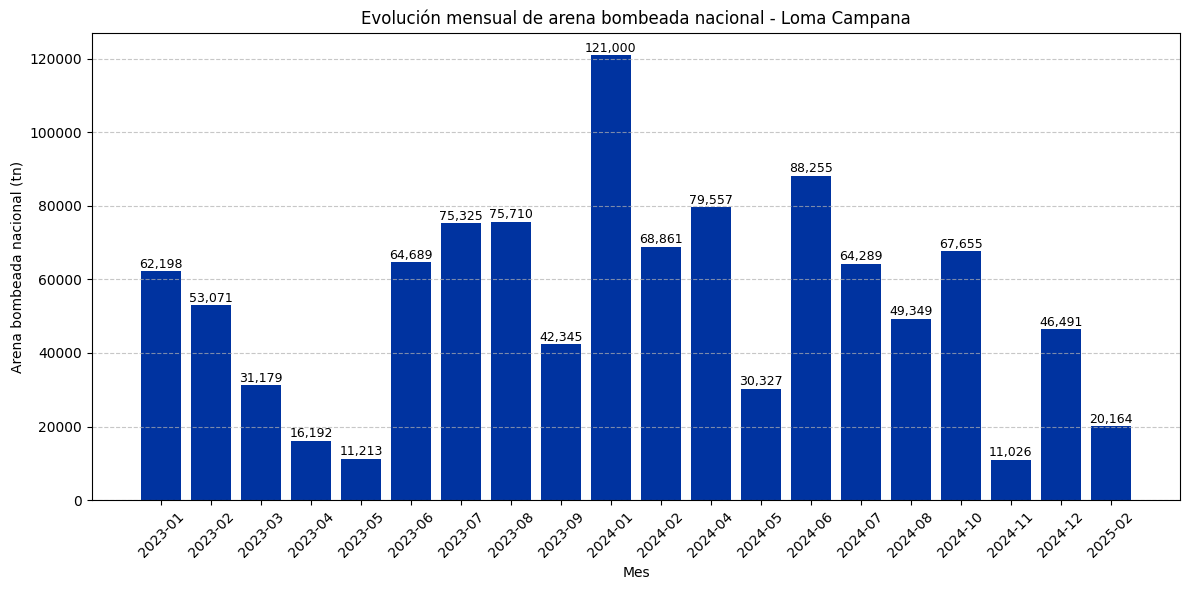

In [48]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_grouped['AñoMes'],
               df_grouped['Arena bombeada nacional (tn)'],
               color='#0033A0')

# Etiquetas en cada barra (enteros)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100,  # 100 es un pequeño espacio arriba
             f'{int(height):,}',  # separador de miles
             ha='center', va='bottom', fontsize=9)

plt.title('Evolución mensual de arena bombeada nacional - Loma Campana')
plt.xlabel('Mes')
plt.ylabel('Arena bombeada nacional (tn)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

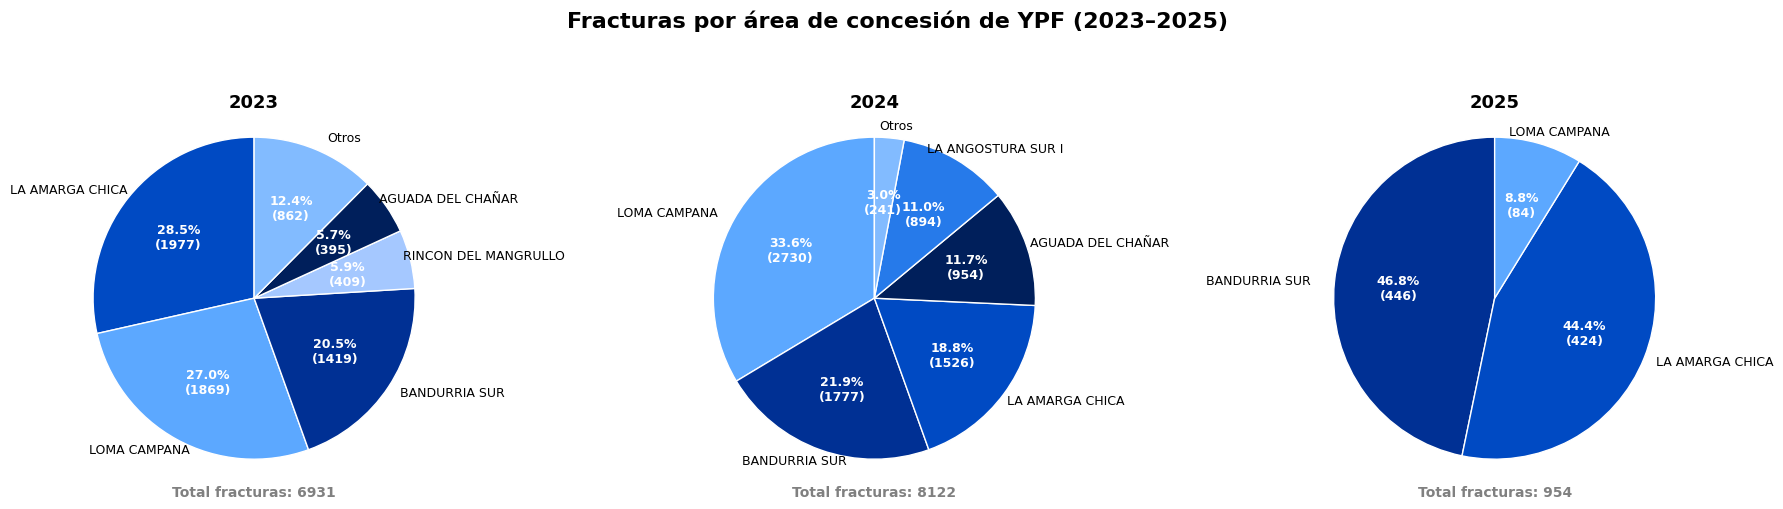

In [54]:
años_filtrados = [2023, 2024, 2025]

grouped = ef_ypf.groupby(['Año', 'Área permiso concesión'])['Cantidad fracturas'].sum().reset_index()
grouped = grouped[grouped['Año'].isin(años_filtrados)]


# Función para obtener top 5 + Otros
def top5_mas_otros(df):
    df = df.sort_values('Cantidad fracturas', ascending=False)
    top5 = df.iloc[:5]
    otros = df.iloc[5:]
    otros_sum = otros['Cantidad fracturas'].sum()
    if otros_sum > 0:
        otros_df = pd.DataFrame([{'Área permiso concesión': 'Otros', 'Cantidad fracturas': otros_sum}])
        top5 = pd.concat([top5, otros_df], ignore_index=True)
    return top5.set_index('Área permiso concesión')['Cantidad fracturas']

# Obtener conjunto de todas las áreas que aparecen en los top 5 + Otros
todas_areas = set()
for year in años_filtrados:
    df_year = grouped[grouped['Año'] == year]
    series = top5_mas_otros(df_year)
    todas_areas.update(series.index)

# Ordenar las áreas para que el mapeo sea reproducible
todas_areas = sorted(todas_areas)

# Crear paleta de colores extendida según cantidad de áreas únicas
cmap = mpl.colors.LinearSegmentedColormap.from_list('ypf_grad', semillas, N=len(todas_areas))

# Asignar un color único a cada área
colores_areas = {area: mpl.colors.rgb2hex(cmap(i / (len(todas_areas) - 1))) for i, area in enumerate(todas_areas)}

# Crear diccionario con Series para cada año con top 5 + otros
data_por_ano = {}
for year in años_filtrados:
    df_year = grouped[grouped['Año'] == year]
    data_por_ano[year] = top5_mas_otros(df_year)

# Paleta degradé azul YPF para 6 áreas (5+otros)
semillas = ['#001F5B', '#0033A0', '#0055D4', '#4C9FFF', '#7BB9FF', '#A5C8FF']
cmap = mpl.colors.LinearSegmentedColormap.from_list('ypf_grad', semillas, N=6)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for ax, (year, series) in zip(axs, data_por_ano.items()):
    colors = [colores_areas[area] for area in series.index]
    wedges, _, autotexts = ax.pie(
        series,
        labels=None,
        startangle=90,
        colors=colors,
        radius=1.35,  # valor mayor a 1 agranda la torta
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},
        autopct=lambda p: f'{p:.1f}%\n({p*series.sum()/100:.0f})',
        textprops={'color': 'white', 'fontsize': 9, 'weight': 'bold'}
    )

    for i, wedge in enumerate(wedges):
        ang = (wedge.theta2 + wedge.theta1) / 2
        x = np.cos(np.deg2rad(ang)) * 1.99
        y = np.sin(np.deg2rad(ang)) * 1.45
        ax.text(
            x, y,
            series.index[i],
            ha='center', va='center',
            fontsize=9, color='black'
        )
    ax.set_title(f'{year}', fontsize=13, fontweight='bold', pad=30)
    ax.text(0.5, -0.15, f'Total fracturas: {series.sum()}', ha='center', va='center',
        transform=ax.transAxes, fontsize=10,fontweight='bold', color='gray')



fig.suptitle('Fracturas por área de concesión de YPF (2023–2025)', fontsize=16, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()

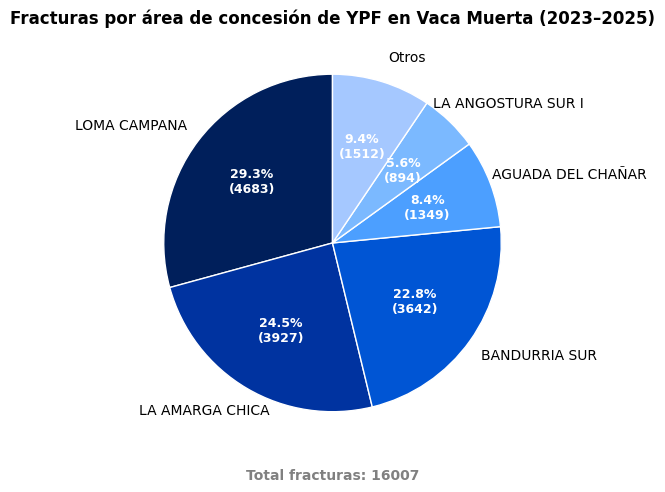

In [55]:
# 1) Filtrar años de interés (2023-2025)
años_filtrados = [2023, 2024, 2025]
ef_ypf_filtrado = ef_ypf[ef_ypf['Año'].isin(años_filtrados)]

# 2) Sumar fracturas por área en el periodo completo
totales = (
    ef_ypf_filtrado
    .groupby('Área permiso concesión')['Cantidad fracturas']
    .sum()
    .sort_values(ascending=False)
)

# 3) Top-5 + "Otros"
top5 = totales.head(5)
otros = totales.iloc[5:].sum()
if otros > 0:
    totales_plot = pd.concat([top5, pd.Series({'Otros': otros})])
else:
    totales_plot = top5        # por si solo hay 5 áreas

# 4) Paleta degradé azul YPF (6 pasos posibles)
semillas = ['#001F5B', '#0033A0', '#0055D4', '#4C9FFF', '#7BB9FF', '#A5C8FF']
cmap = mpl.colors.LinearSegmentedColormap.from_list('ypf_grad', semillas, N=len(totales_plot))
colors = [mpl.colors.rgb2hex(cmap(i)) for i in np.linspace(0, 1, len(totales_plot))]

# 5) Graficar la única torta
fig, ax = plt.subplots(figsize=(6, 6))

wedges, _, _ = ax.pie(
    totales_plot,
    labels=None,
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    autopct=lambda p: f'{p:.1f}%\n({p*totales_plot.sum()/100:.0f})',
    textprops={'color': 'white', 'fontsize': 9, 'weight': 'bold'}
)

# Nombres afuera con líneas guía (opcional)
from matplotlib.patches import ConnectionPatch
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 + wedge.theta1) / 2
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
    tx, ty = x*1.50, y*1.15             # posición del texto
    ax.text(tx, ty, totales_plot.index[i],
            ha='center', va='center', fontsize=10, color='black')

ax.set_title('Fracturas por área de concesión de YPF en Vaca Muerta (2023–2025)', fontweight='bold')
ax.text(0.5, -0.05, f'Total fracturas: {totales_plot.sum()}', ha='center', va='center',
        transform=ax.transAxes, fontsize=10, fontweight='bold', color='gray')

#

plt.tight_layout()
plt.show()

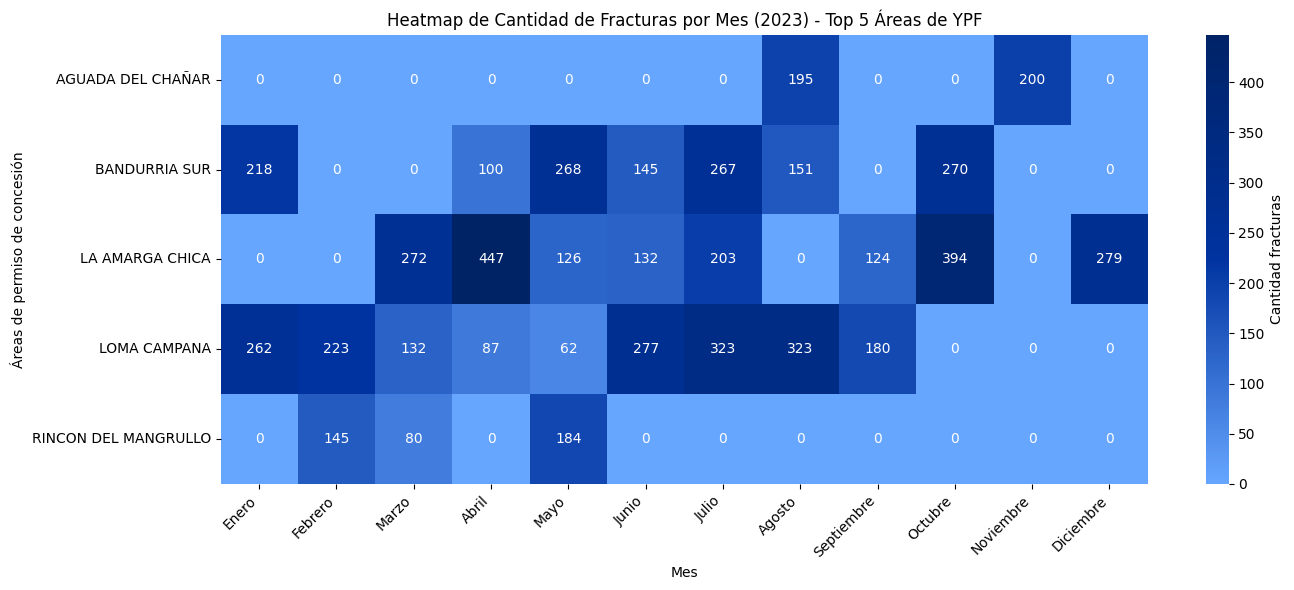

In [82]:
# Lista manual de meses en español
meses_es = [
    "", "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]

df_2023 = ef_ypf[ef_ypf['Año'] == 2023]

agg = df_2023.groupby(['Área permiso concesión', 'Mes'])['Cantidad fracturas'].sum().reset_index()

top_5_areas = agg.groupby('Área permiso concesión')['Cantidad fracturas'].sum().nlargest(5).index
agg_top5 = agg[agg['Área permiso concesión'].isin(top_5_areas)]

pivot_table = agg_top5.pivot(index='Área permiso concesión', columns='Mes', values='Cantidad fracturas').fillna(0)

meses_nombres = [meses_es[m] for m in pivot_table.columns]

# Colormap invertido: celeste claro para 0, azul fuerte para valores altos
ypf_blue_invert = LinearSegmentedColormap.from_list(
    "ypf_blue_invert",
    ["#66A6FF",  # celeste claro (mínimo)
     "#0033A0",  # azul YPF oscuro (medio)
     "#002366"]  # azul muy fuerte (máximo)
)

plt.figure(figsize=(14, 6))
ax = sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap=ypf_blue_invert, cbar_kws={'label': 'Cantidad fracturas'})

ax.set_xticklabels(meses_nombres, rotation=45, ha='right')

plt.title('Heatmap de Cantidad de Fracturas por Mes (2023) - Top 5 Áreas de YPF')
plt.xlabel('Mes')
plt.ylabel('Áreas de permiso de concesión')
plt.tight_layout()
plt.show()

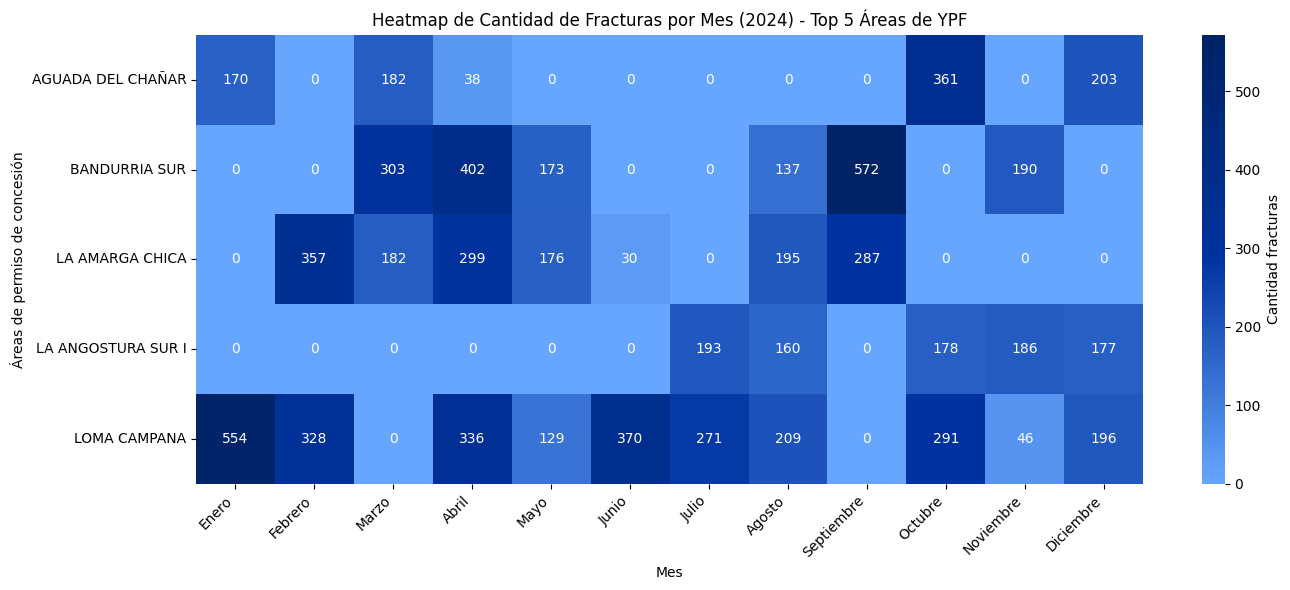

In [81]:
# Lista manual de meses en español
meses_es = [
    "", "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]

# Filtrar para año 2024
df_2024 = ef_ypf[ef_ypf['Año'] == 2024]

agg = df_2024.groupby(['Área permiso concesión', 'Mes'])['Cantidad fracturas'].sum().reset_index()

top_5_areas = agg.groupby('Área permiso concesión')['Cantidad fracturas'].sum().nlargest(5).index
agg_top5 = agg[agg['Área permiso concesión'].isin(top_5_areas)]

pivot_table = agg_top5.pivot(index='Área permiso concesión', columns='Mes', values='Cantidad fracturas').fillna(0)

meses_nombres = [meses_es[m] for m in pivot_table.columns]

# Colormap invertido: celeste claro para 0, azul fuerte para valores altos
ypf_blue_invert = LinearSegmentedColormap.from_list(
    "ypf_blue_invert",
    ["#66A6FF",  # celeste claro (mínimo)
     "#0033A0",  # azul YPF oscuro (medio)
     "#002366"]  # azul muy fuerte (máximo)
)

plt.figure(figsize=(14, 6))
ax = sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap=ypf_blue_invert, cbar_kws={'label': 'Cantidad fracturas'})

ax.set_xticklabels(meses_nombres, rotation=45, ha='right')

plt.title('Heatmap de Cantidad de Fracturas por Mes (2024) - Top 5 Áreas de YPF')
plt.xlabel('Mes')
plt.ylabel('Áreas de permiso de concesión')
plt.tight_layout()
plt.show()

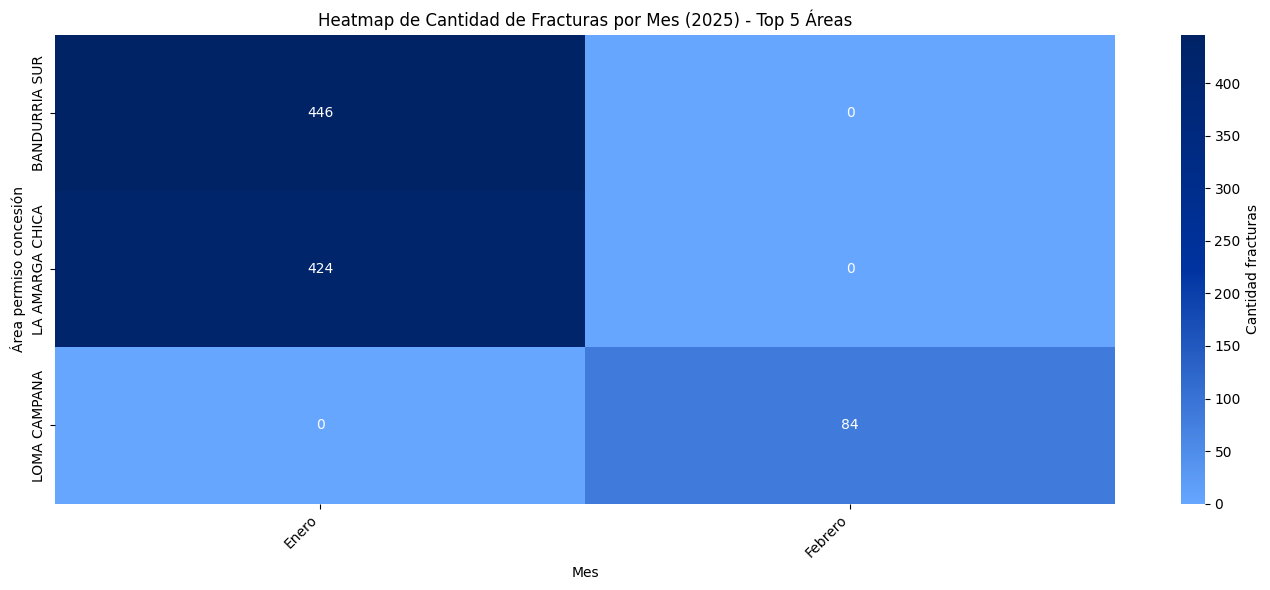

In [80]:
# Lista manual de meses en español
meses_es = [
    "", "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]

# Filtrar solo año 2025
df_2025 = ef_ypf[ef_ypf['Año'] == 2025]

# Agrupar por área y mes
agg = df_2025.groupby(['Área permiso concesión', 'Mes'])['Cantidad fracturas'].sum().reset_index()

# Top 5 áreas por cantidad total
top_5_areas = agg.groupby('Área permiso concesión')['Cantidad fracturas'].sum().nlargest(5).index
agg_top5 = agg[agg['Área permiso concesión'].isin(top_5_areas)]

# Pivot para heatmap
pivot_table = agg_top5.pivot(index='Área permiso concesión', columns='Mes', values='Cantidad fracturas').fillna(0)

# Nombres de meses en español
meses_nombres = [meses_es[m] for m in pivot_table.columns]

# Colormap invertido: celeste claro para 0, azul fuerte para valores altos
ypf_blue_invert = LinearSegmentedColormap.from_list(
    "ypf_blue_invert",
    ["#66A6FF",  # celeste claro (mínimo)
     "#0033A0",  # azul YPF (medio)
     "#002366"]  # azul muy fuerte (máximo)
)

# Gráfico
plt.figure(figsize=(14, 6))
ax = sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap=ypf_blue_invert, cbar_kws={'label': 'Cantidad fracturas'})
ax.set_xticklabels(meses_nombres, rotation=45, ha='right')

plt.title('Heatmap de Cantidad de Fracturas por Mes (2025) - Top 5 Áreas')
plt.xlabel('Mes')
plt.ylabel('Área permiso concesión')
plt.tight_layout()
plt.show()